# Segmentation des cerveaux de souris
Le détail du code est disponible dans le dossier src.

1. Chargement des données brutes
2. Augmentation
3. Modèle
4. Entrainement
5. Tests

In [1]:
# Chargement des librairies
import tensorflow as tf
import matplotlib.pyplot as plt

## 1. Chargement des données brutes
Les données en trois dimensions du dossier data sont chargés en utilisant nibabel.

In [2]:
import src.data as data
data_train, data_test, label_train, label_test = data.load_data()

In [3]:
data_train.shape

(11, 128, 128, 128, 1)

In [4]:
data_test.shape

(3, 128, 128, 128, 1)

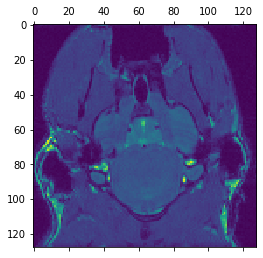

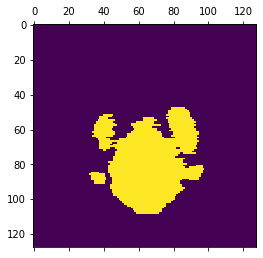

In [5]:
plt.matshow(data_train[0,64].reshape((128,128)))
plt.matshow(label_train[0,64].reshape((128,128)))

## 2. Augmentation des données
Nous avons créer une fonction qui transforme aléatoirement une données en utlisant des rotations dans tous les axes, et une symétrie

In [6]:
new_data, new_label = data.augment(data_train[0], label_train[0])

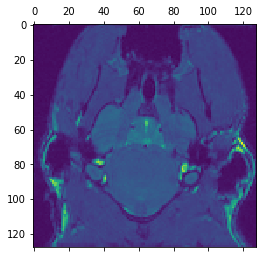

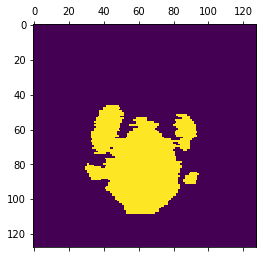

In [7]:
plt.matshow(new_data[64].reshape((128,128)))
plt.matshow(new_label[64].reshape((128,128)))

In [8]:
epochs = 10
size_train = 128
batch_size = 4
step_per_epochs = size_train // batch_size

In [9]:
data_train, data_test, label_train, label_test = data.load_data()
# La classe MouseBrainSequence génère la séquence des données de test
train_sequence = data.MouseBrainSequence((data_train, label_train), size=size_train, batch_size=batch_size)
data_test, label_test = data.fill_augment(data_test, label_test, batch_size)

## 3. Modèle
Nous utilisons un réseau U-Net, l'implémentation est issue de ce lien https://github.com/ellisdg/3DUnetCNN/blob/master/unet3d/model/unet.py.

Nous avons seulement adapté les objets à la dernière version de Keras.

Nous utilisons une profondeur de 2 afin de ne pas dépasser la capacité mémoire de la machine.

In [10]:
import src.network as network
model = network.unet_model_3d((128,128,128,1), depth=2)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 12 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 128, 128, 128 896         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 128 0           conv3d[0][0]                     
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 128, 128, 128 55360       activation[0][0]                 
______________________________________________________________________________________________

## 4. Entrainement
L'entrainement s'effectue en lançant le script `src/train.py`.

Il faut près de 7 heures par epoch l'entrainement sur les machines de plafrims avec des cpu à 20 coeurs.

In [14]:
# Historique de l'entrainement
history = open("models/unet3d-history.csv","r")
print(history.read())

epoch dice_coefficient loss
0 0.45705914 -0.4570591477677226



## 5. Tests

Les tests s'effectuent en lançant le script `src/test.py`.

Nous obtenons un dice de .

## 6. Conclusion
Nous avons obtenus modèle qui s'évalue à un dice de XXX

Plusieurs choses pourraient être faites pour atteindre les performances maximales de ce modèles
- Augmenter la taille de batch size
- Tester avec d'autres méthodes d'augmentations, shift, zoom, couleurs, bruit
- Distribuer le code sur plusieurs noeuds pour accélérer l'entrainement https://www.tensorflow.org/guide/distributed_training
- Expérimenter avec d'autres paramètres, profondeur du réseau, optimizer, fonction de coût, etc